# Visual Translator Performance Analysis

이 노트북은 `pipeline_metrics.json` 데이터를 로드하여 성능 지표를 시각화합니다.

**분석 항목:**
1. **Latency Analysis**: 각 단계별 소요 시간 분포
2. **Confidence Analysis**: OCR 인식 신뢰도 분포
3. **Translation Quality**: 원문 vs 번역문 비교

In [6]:
import json
import matplotlib.pyplot as plt
import pandas as pd

# 한글 폰트 설정 (Windows 기본 맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
try:
    with open('pipeline_metrics.json', 'r', encoding='utf-8') as f:
        data = json.load(f)
    print("Metrics loaded successfully.")
except FileNotFoundError:
    print("Error: 'pipeline_metrics.json' not found. Run main.py first!")

Metrics loaded successfully.


## 1. Latency Analysis (처리 속도)

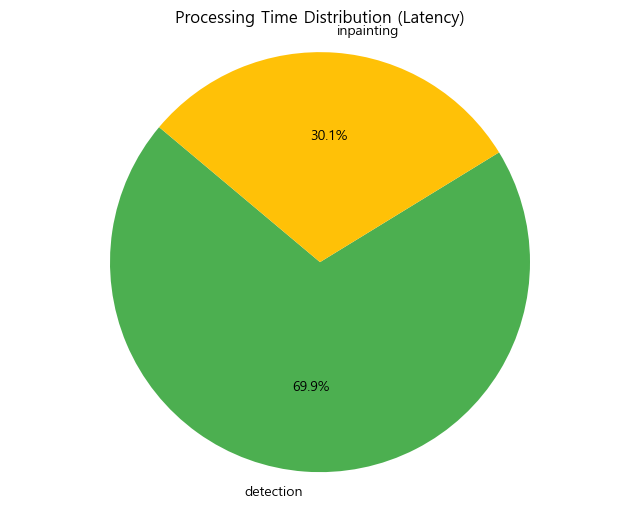

Detection Time: 21.03s
Inpainting Time: 9.07s


In [7]:
latency = data.get('latency', {})
labels = list(latency.keys())
times = list(latency.values())

plt.figure(figsize=(8, 6))
plt.pie(times, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#4CAF50', '#FFC107'])
plt.title('Processing Time Distribution (Latency)')
plt.axis('equal')
plt.show()

print(f"Detection Time: {latency.get('detection', 0):.2f}s")
print(f"Inpainting Time: {latency.get('inpainting', 0):.2f}s")

## 2. OCR Confidence Analysis (인식 신뢰도)

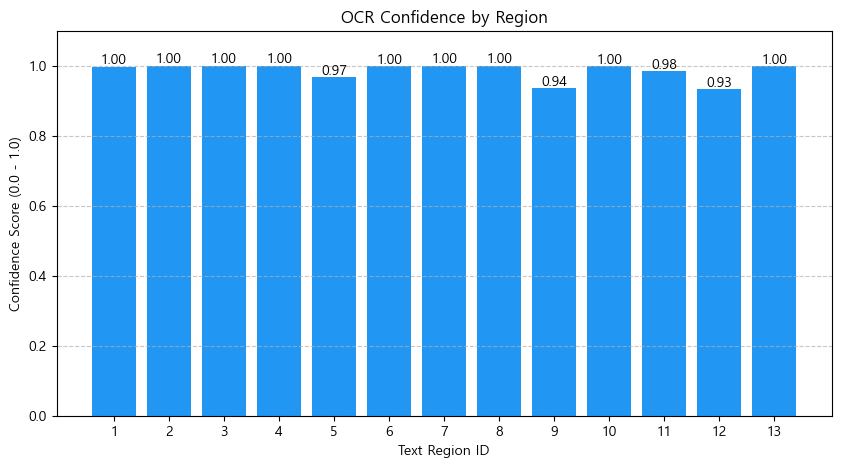

In [8]:
regions = data.get('regions', [])
ids = [r['id'] for r in regions]
confidences = [r['confidence'] for r in regions]

plt.figure(figsize=(10, 5))
bars = plt.bar(ids, confidences, color='#2196F3')

plt.xlabel('Text Region ID')
plt.ylabel('Confidence Score (0.0 - 1.0)')
plt.title('OCR Confidence by Region')
plt.ylim(0, 1.1)
plt.xticks(ids)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 값 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, 
             f'{height:.2f}', ha='center', va='bottom')

plt.show()

## 3. Translation Quality Check (번역 결과)

In [9]:
df = pd.DataFrame(regions)
df = df[['id', 'confidence', 'original_text', 'translated_text']]
df.columns = ['ID', 'Confidence', 'Original', 'Translated']
display(df)

,ID,Confidence,Original,Translated
0,1,0.997600,숙소,숙소
1,2,0.999874,제주디오빌,제주디오빌
2,3,0.999737,"99,023원","99,023원"
3,4,0.999720,주소,주소
4,5,0.966509,제주특별자치도 서귀포시 색달동2200,제주특별자치도 서귀포시 색달동2200
5,6,0.999266,전화번호,전화번호
6,7,0.999543,064-738-6555,064-738-6555
7,8,0.999797,설명,설명
8,9,0.935603,서귀포 중문관광단지 인근에 위치한 뷰가 아름다운 펜션,서귀포 중문관광단지 인근에 위치한 뷰가 아름다운 펜션
9,10,0.999489,위치,위치
